In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Exploration and Visualization

In [6]:
left_company = df[df.left==1]
left_company.shape

(3571, 10)

In [7]:
retained = df[df.left==0]
retained.shape

(11428, 10)

Average in all columns

In [8]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the above table, below features affect the retention of an employee:

1. **satisfaction level**
2. **average_monthly_hours**
3. **promotion_last_5years**



# Impact of salary on retention:

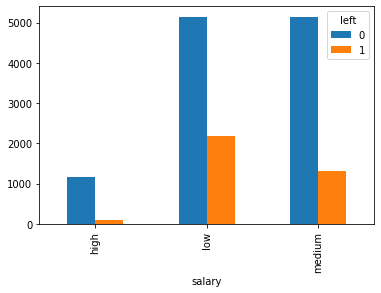

In [9]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')

Employees with high salary are likely not to leave company

Below are the features required for analysis:
From the above table, below features affect the retention of an employee:

1. satisfaction level
2. average_monthly_hours
3. promotion_last_5years
4. Salary


In [11]:
data = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


Convert salary into dummy:

In [12]:
dummies = pd.get_dummies(data.salary,prefix='salary')
dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [18]:
merged = pd.concat([data,dummies],axis='columns')
X = merged.drop(['salary','salary_low'],axis='columns')

In [19]:
## Feature data
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
0,0.38,157,0,0,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,0,0
4,0.37,159,0,0,0


In [20]:
##Target data
y = df.left

## Logistic Regression

In [31]:
## Split the data into Train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=10)

In [32]:
## Build the model and train it
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
## Predictions on test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
##Model Accuracy
model.score(X_test,y_test)

0.7706666666666667